In [11]:
import h5py
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import random

# ------------------------------------------------------------
# Paths to your files (edit for your sample)
# ------------------------------------------------------------
# h5_path = "/home/puneet/maninder/data/cscc_dataset/GSM4284316_patches.h5"
# h5ad_path = "/home/puneet/maninder/data/cscc_dataset/GSM4284316_spots.h5ad"

h5_path = "/home/puneet/maninder/data/her2st_dataset/H1.h5"
h5ad_path = "/home/puneet/maninder/data/her2st_dataset/H1.h5ad"

# h5_path = "/home/puneet/maninder/data/10X_HumandBreastCancer_data/Processed_Output/cells_patches.h5"
# h5ad_path = "/home/puneet/maninder/data/10X_HumandBreastCancer_data/Processed_Output/cells_expression.h5ad"

Cell 2: Explore .h5 file (patches + coords)

In [12]:
# Open H5 file
with h5py.File(h5_path, "r") as f:
    print("🔹 Keys in H5 file:")
    for k in f.keys():
        print(f"  {k} → shape: {f[k].shape}")

    # Load datasets
    patches = f["patches"][:]
    pixel_x = f["pixel_x"][:]
    pixel_y = f["pixel_y"][:]
    x = f["x"][:]
    y = f["y"][:]

print("\n✅ Loaded H5 data:")
print(f"Patches shape: {patches.shape} (N, H, W, C)")
print(f"pixel_x range: {pixel_x.min():.1f} → {pixel_x.max():.1f}")
print(f"pixel_y range: {pixel_y.min():.1f} → {pixel_y.max():.1f}")


🔹 Keys in H5 file:
  patches → shape: (613, 112, 112, 3)
  pixel_x → shape: (613,)
  pixel_y → shape: (613,)
  x → shape: (613,)
  y → shape: (613,)

✅ Loaded H5 data:
Patches shape: (613, 112, 112, 3) (N, H, W, C)
pixel_x range: 560.0 → 8998.0
pixel_y range: 2300.0 → 9611.0


Cell 3: Show 5 random image patches

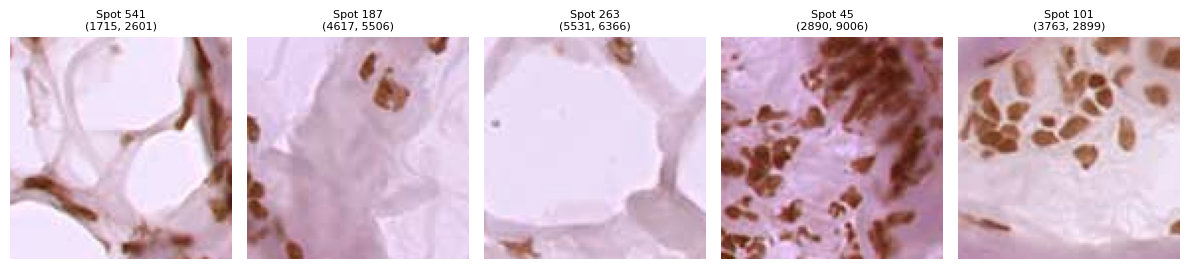

In [13]:
# Display 5 random patches from H5
plt.figure(figsize=(12, 6))
indices = random.sample(range(len(patches)), 5)

for i, idx in enumerate(indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(patches[idx])
    plt.title(f"Spot {idx}\n({int(pixel_x[idx])}, {int(pixel_y[idx])})", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


Cell 4: Explore .h5ad file (expression + metadata)

In [14]:
adata = sc.read_h5ad(h5ad_path)

print(" AnnData summary:")
print(adata)
print("\n.obs (spot metadata):")
print(adata.obs.head())

print("\n.var (gene names):")
print(adata.var_names[:10])

# Basic structure
print(f"\nExpression matrix shape: {adata.X.shape} (spots × genes)")


 AnnData summary:
AnnData object with n_obs × n_vars = 613 × 15029
    obs: 'spot_id', 'x', 'y', 'pixel_x', 'pixel_y'

.obs (spot metadata):
  spot_id   x   y  pixel_x  pixel_y
0   10x10  10  10     2581     2603
1   10x11  10  11     2583     2896
2   10x12  10  12     2581     3175
3   10x13  10  13     2583     3464
4   10x14  10  14     2581     3760

.var (gene names):
Index(['FO538757.1', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4',
       'ISG15', 'AGRN', 'C1orf159'],
      dtype='object')

Expression matrix shape: (613, 15029) (spots × genes)


In [15]:
assert len(adata.obs) == patches.shape[0], "Mismatch between H5 and H5AD!"
print("Number of spots match between H5 and H5AD!")

# Check coordinate alignment
diff_x = np.abs(adata.obs["pixel_x"].values - pixel_x)
diff_y = np.abs(adata.obs["pixel_y"].values - pixel_y)

print(f"Max deviation in pixel_x: {diff_x.max():.4f}")
print(f"Max deviation in pixel_y: {diff_y.max():.4f}")


Number of spots match between H5 and H5AD!
Max deviation in pixel_x: 0.0000
Max deviation in pixel_y: 0.0000


Xenium_data_visualization

🧩 Exploring H5 file: /home/puneet/maninder/data/10X_HumandBreastCancer_data/Processed_Output/cells_patches.h5

🔹 Keys in H5 file:
  cell_ids → shape: (167780,), dtype: uint32
  coords_px → shape: (167780, 2), dtype: float64
  patches → shape: (167780, 128, 128, 3), dtype: uint8
  pixel_x → shape: (167780,), dtype: float64
  pixel_y → shape: (167780,), dtype: float64

✅ Loaded patches: (167780, 128, 128, 3)
pixel_x range: 5981.9 → 26705.4
pixel_y range: 6720.0 → 21837.9

🧠 Exploring H5AD file: /home/puneet/maninder/data/10X_HumandBreastCancer_data/Processed_Output/cells_expression.h5ad

📊 AnnData summary:
AnnData object with n_obs × n_vars = 167780 × 541
    obs: 'x_pixel', 'y_pixel', 'x_um', 'y_um', 'cell_id'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial_metadata'
    obsm: 'spatial'

.obs (spot metadata):
       x_pixel       y_pixel         x_um         y_um cell_id
1  8297.872054  20873.427763  1763.297812  4435.603400       1
2  8240.416488  20868.090258  1751.08

/tmp/ipykernel_196816/639927158.py:66: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/puneet/anaconda3/envs/isbi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


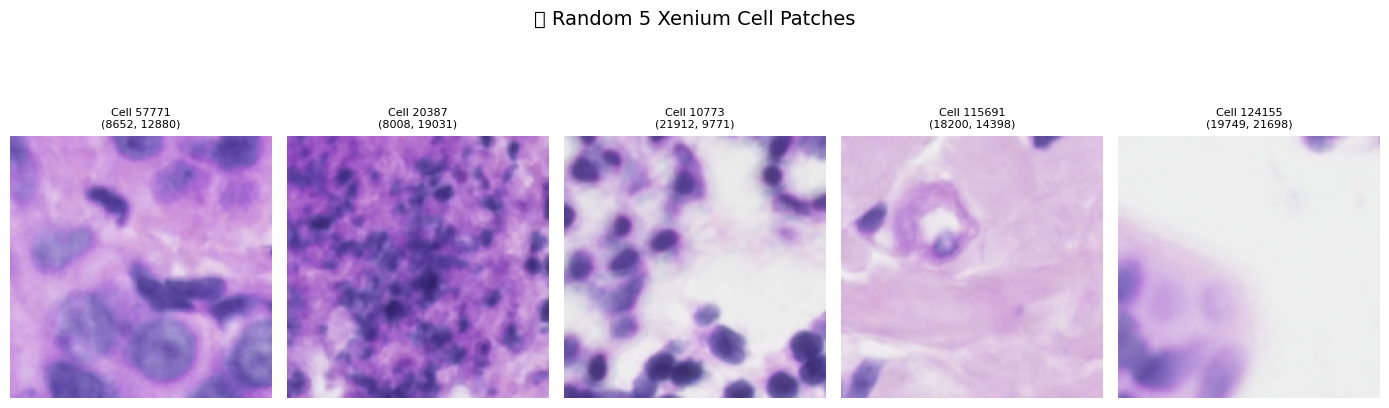

In [16]:
import h5py
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# ------------------------------------------------------------
# 1️⃣ Define file paths
# ------------------------------------------------------------
output_dir = "/home/puneet/maninder/data/10X_HumandBreastCancer_data/Processed_Output"
h5_path = os.path.join(output_dir, "cells_patches.h5")
h5ad_path = os.path.join(output_dir, "cells_expression.h5ad")

# ------------------------------------------------------------
# 2️⃣ Explore H5 file
# ------------------------------------------------------------
print("🧩 Exploring H5 file:", h5_path)
with h5py.File(h5_path, "r") as f:
    print("\n🔹 Keys in H5 file:")
    for k in f.keys():
        obj = f[k]
        if isinstance(obj, h5py.Dataset):
            print(f"  {k} → shape: {obj.shape}, dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"  {k} → group")

    patches = f["patches"][:]
    pixel_x = f["pixel_x"][:]
    pixel_y = f["pixel_y"][:]

print(f"\n✅ Loaded patches: {patches.shape}")
print(f"pixel_x range: {pixel_x.min():.1f} → {pixel_x.max():.1f}")
print(f"pixel_y range: {pixel_y.min():.1f} → {pixel_y.max():.1f}")

# ------------------------------------------------------------
# 3️⃣ Explore H5AD file
# ------------------------------------------------------------
print("\n🧠 Exploring H5AD file:", h5ad_path)
adata = sc.read_h5ad(h5ad_path)

print("\n📊 AnnData summary:")
print(adata)

print("\n.obs (spot metadata):")
print(adata.obs.head())

print("\n.var (first 10 gene names):")
print(list(adata.var_names[:10]))

print(f"\n🧮 Expression matrix shape: {adata.X.shape} (cells × genes)")

# ------------------------------------------------------------
# 4️⃣ Visualize 5 random patches
# ------------------------------------------------------------
plt.figure(figsize=(14, 5))
indices = random.sample(range(len(patches)), 5)

for i, idx in enumerate(indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(patches[idx])
    plt.title(f"Cell {idx}\n({int(pixel_x[idx])}, {int(pixel_y[idx])})", fontsize=8)
    plt.axis("off")

plt.suptitle("🧩 Random 5 Xenium Cell Patches", fontsize=14)
plt.tight_layout()
plt.show()
